In [ ]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, classification_report

In [ ]:
# Import CSVs
order_list = pd.read_csv("list_of_orders.csv")
order_details = pd.read_csv("order_details.csv")
sales_target = pd.read_csv("sales_target.csv")
pd.options.display.max_columns = 100


In [ ]:
# Listing columns for visulisation
order_list.head(3)

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal


In [ ]:
order_details.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief


In [ ]:
sales_target.head(3)

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0


Using the Order ID as an index, the date of the order, the State and City from the "list of orders" dataset can be found. Furthermore, using the Order ID, the Amount of the order, the Profit made, and the Category, can be found. From the Category and Date, the % to target/% over target, can be found. From all the above, the State and City with the highest amount of orders can be found, as can the highest performing categories.

In [ ]:
# Merge "list of orders" and "order details"

df = pd.merge(order_list, order_details, on="Order ID")
df.head(3)


,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief


In [ ]:
df.dtypes

Order ID         object
Order Date       object
CustomerName     object
State            object
City             object
Amount          float64
Profit          float64
Quantity          int64
Category         object
Sub-Category     object
dtype: object

In [ ]:
df.shape

(1500, 10)

In [ ]:
# Checking for missing values
(df.isna().sum()/len(df))*100

Order ID        0.0
Order Date      0.0
CustomerName    0.0
State           0.0
City            0.0
Amount          0.0
Profit          0.0
Quantity        0.0
Category        0.0
Sub-Category    0.0
dtype: float64

As there are no missing values, imputation was not required.

In [ ]:
# Cleaning and transformation functions

df["Order ID"] = df["Order ID"].astype('string')
df["State"] = df["State"].astype("category")
df["City"] = df["City"].astype('string')
sales_target = sales_target.rename(columns={'Month of Order Date': 'Order Date'})
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")
df = df.drop('CustomerName', axis=1)

In [ ]:

sales_target['Order Date'] = pd.to_datetime(sales_target['Order Date'], format='%b-%y')
sales_target.head()

,Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0


In [ ]:
sales_target.dtypes

Order Date    datetime64[ns]
Category              object
Target               float64
dtype: object

# The Questions
## Question 1
Question: What is the total sales and profit for each category and sub-category?
Analysis: By merging the "order_details.csv" and "list_of_orders.csv" datasets based on the "Order ID" column, we can calculate the total sales and profit for each category and sub-category. This analysis will provide insights into the revenue generated and profitability of different product categories.
## Question 2
Question: Is there a correlation between the sales target and the actual sales achieved for each month?
Analysis: By comparing the "Sales_target.csv" and "list_of_orders.csv" datasets based on the "Month of Order Date" column, we can determine the correlation between the sales target and the actual sales achieved. This analysis can help assess the effectiveness of the sales target setting and identify any patterns or trends in sales performance.
## Question 3
Question (Prediction): Can we predict the future sales based on historical data?
Analysis: Using historical data from the "list_of_orders.csv" dataset, we can build a predictive model to forecast future sales. By applying regression or time series analysis techniques, we can train the model on past sales patterns and make predictions for future periods. This analysis will provide insights into potential sales trends and assist in making informed business decisions.

# Analysis
## Question 1
Question: What is the total sales and profit for each category and sub-category?
Analysis: By merging the "order_details.csv" and "list_of_orders.csv" datasets based on the "Order ID" column, we can calculate the total sales and profit for each category and sub-category. This analysis will provide insights into the revenue generated and profitability of different product categories.


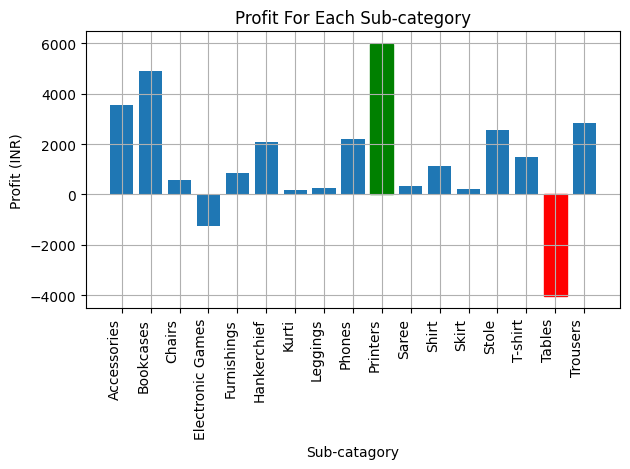

In [ ]:

category_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
subcat_profit = category_profit['Sub-Category']
profit_profit = category_profit['Profit']
highest_index = np.argmax(profit_profit)
lowest_index = np.argmin(profit_profit)
fig, ax = plt.subplots()
bars = ax.bar(subcat_profit, profit_profit)
bars[highest_index].set_color('green')
bars[lowest_index].set_color('red')

plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.title("Profit For Each Sub-category")
plt.xlabel("Sub-catagory")
plt.ylabel("Profit (INR)")
plt.tight_layout()
plt.grid()
plt.show()

## Graph Analysis
Based on the graphical representation, it is evident that the sub-category exhibiting the highest performance is "Printers," while the sub-category demonstrating the lowest performance is "Tables." Consequently, it can be inferred that the overarching category of 'Furniture' represents the lowest performing category, while 'Electronics' stands out as the highest performing category.

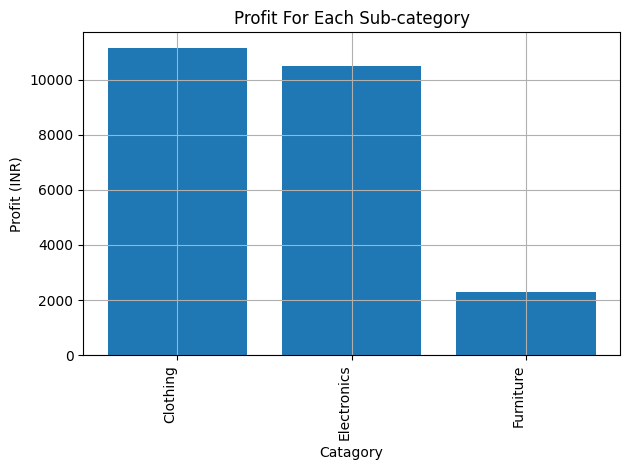

In [ ]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
subcat_profit = category_profit['Category']
profit_profit = category_profit['Profit']
plt.bar(subcat_profit, profit_profit)
plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.title("Profit For Each Sub-category")
plt.xlabel("Catagory")
plt.ylabel("Profit (INR)")
plt.tight_layout()
plt.grid()
plt.show()

As can be seen by the above graph, the initial prediction that the 'Furniture' category performs the worse was true, however, it can be seen that despite being the worst, 'Furniture' still produces a profit. It can be inferred that either there are more furniture subcategories to offset the loss, or profits on other furniture subcategories are higher than furniture.

In [ ]:
subcategory_category = df.sort_values(by='Category')
subcategory_category = subcategory_category.drop(columns=['Order ID', 'Order Date', 'State', 'City', 'Amount', 'Profit', 'Quantity'])
subcategory_count = subcategory_category.groupby('Category')['Sub-Category'].nunique()
subcategory_count = subcategory_count.reset_index().rename(columns={'Sub-Category': 'Category Count'})
print(subcategory_count)

      Category  Category Count
0     Clothing               9
1  Electronics               4
2    Furniture               4


The graphical representation above illustrates the distribution of the 17 distinct sub-categories. It is evident that my initial assumption regarding the prevalence of furniture subcategories was proven incorrect. Consequently, our focus will now shift towards assessing the profitability of the various subcategories within each overarching category.

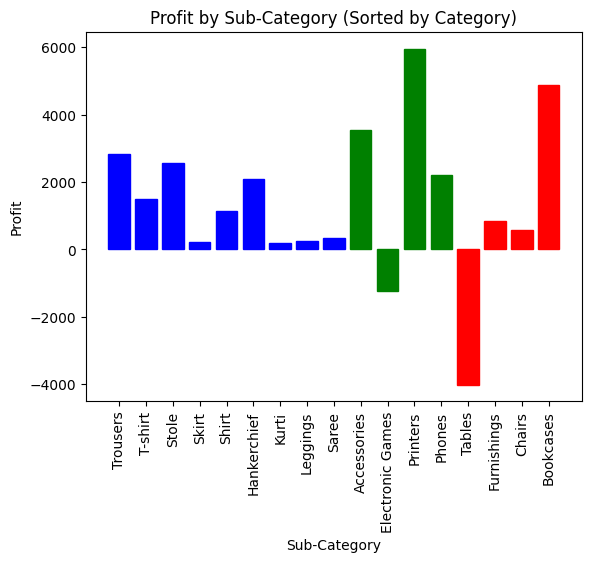

In [ ]:
profit_subcategory = df.sort_values(by='Category')
profit_subcategory = profit_subcategory.drop(columns=['Order ID', 'Order Date', 'State', 'City', 'Amount', 'Quantity'])
profit_subcategory = profit_subcategory.groupby('Sub-Category').agg({'Category': 'first', 'Profit': 'sum'})
profit_subcategory = profit_subcategory.sort_values(by='Category')
color_category = {'Furniture' : "red", "Electronics" : "green", "Clothing" : "blue"}
color_list = []
for category in profit_subcategory['Category']:
    color_list.append(color_category.get(category))

profit_subcategory['color'] = color_list
fig, ax = plt.subplots()
ax.bar(profit_subcategory.index, profit_subcategory['Profit'])



for i, color in enumerate(profit_subcategory['color']):
    ax.get_children()[i].set_color(color)

plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit by Sub-Category (Sorted by Category)')
plt.xticks(rotation=90)
plt.show()

As can be seen, the "Tables" Sub-category's losses, were offset by the high performing Bookcases. In the same way "Electronic Games" are underperforming, however are offset by the "Printers" sub-category.

In [ ]:
profits = []

for total_prof in df.groupby(by='Category')['Profit'].sum():
    profits.append(total_prof)
subcategory_count['Profit Average'] = profits/subcategory_count['Category Count']
print(subcategory_count)

      Category  Category Count  Profit Average
0     Clothing               9     1240.333333
1  Electronics               4     2623.500000
2    Furniture               4      574.500000


From this, it can be seen that "Electronics" on average, are the strongest performing category, and you can infer that expansion of "Electronics" would yield more profit. To further understand why "Furniture" is underperforming in comparison to other categories, customer feedback would be very useful data to recieve.

# Question 2

Question: Is there a correlation between the sales target and the actual sales achieved for each month?
Analysis: By comparing the "Sales_target.csv" and "list_of_orders.csv" datasets based on the "Month of Order Date" column, we can determine the correlation between the sales target and the actual sales achieved. This analysis can help assess the effectiveness of the sales target setting and identify any patterns or trends in sales performance.

In [ ]:
df_profit_per_month = df.groupby(df['Order Date'].dt.to_period('M'))['Amount'].sum().reset_index()

city_profit = df_profit_per_month['Order Date']
profit_profit = df_profit_per_month['Amount']
print(df_profit_per_month)

   Order Date   Amount
0     2018-04  32726.0
1     2018-05  28545.0
2     2018-06  23658.0
3     2018-07  12966.0
4     2018-08  30899.0
5     2018-09  26628.0
6     2018-10  31615.0
7     2018-11  48086.0
8     2018-12  37579.0
9     2019-01  61439.0
10    2019-02  38424.0
11    2019-03  58937.0


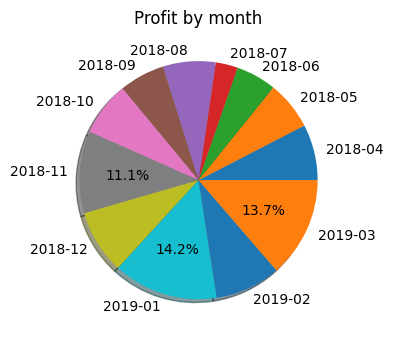

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

# Any slice below 10% does not receive a label

def autopct_format(value):
    if value < 10:
        return ''
    else:
        return '%1.1f%%' % value

plt.pie(df_profit_per_month['Amount'], labels = df_profit_per_month['Order Date'], shadow = True, autopct=autopct_format)
plt.title("Profit by month")

plt.tight_layout()
plt.show()

In [ ]:
sales_target.head(10)

,Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0
5,2018-09-01,Furniture,11000.0
6,2018-10-01,Furniture,11100.0
7,2018-11-01,Furniture,11300.0
8,2018-12-01,Furniture,11400.0
9,2019-01-01,Furniture,11500.0


In [ ]:
sales_target['Order Date'] = sales_target['Order Date'].dt.to_period('M')

In [ ]:
sales_target.head(37)

,Order Date,Category,Target
0,2018-04,Furniture,10400.0
1,2018-05,Furniture,10500.0
2,2018-06,Furniture,10600.0
3,2018-07,Furniture,10800.0
4,2018-08,Furniture,10900.0
5,2018-09,Furniture,11000.0
6,2018-10,Furniture,11100.0
7,2018-11,Furniture,11300.0
8,2018-12,Furniture,11400.0
9,2019-01,Furniture,11500.0


In [ ]:

df_profit_per_month_category = df.groupby([df['Category'], df['Order Date'].dt.to_period('M')])['Amount'].sum().reset_index()

df_profit_per_month_category

,Category,Order Date,Amount
0,Clothing,2018-04,13478.0
1,Clothing,2018-05,9518.0
2,Clothing,2018-06,8782.0
3,Clothing,2018-07,2981.0
4,Clothing,2018-08,11822.0
5,Clothing,2018-09,10717.0
6,Clothing,2018-10,11488.0
7,Clothing,2018-11,16270.0
8,Clothing,2018-12,9545.0
9,Clothing,2019-01,13466.0


In [ ]:
categories = ['Furniture', 'Electronics', 'Clothing']

def category_sort(categories):
    sales_target_category = sales_target.loc[sales_target['Category'] == f'{categories}']
    df_profit_per_month_categories = df_profit_per_month_category.loc[df_profit_per_month_category['Category'] == categories]
    category_target_amount = pd.merge(sales_target_category, df_profit_per_month_categories, on='Order Date')
    category_target_amount = category_target_amount.drop(columns='Category_y')
    return category_target_amount

In [ ]:
furniture_target_amount = category_sort(categories[0])
electronics_target_amount = category_sort(categories[1])
clothing_target_amount = category_sort(categories[2])

target_amounts = [furniture_target_amount['Amount'], electronics_target_amount['Amount'], clothing_target_amount['Amount']]
target_target = [furniture_target_amount['Target'], electronics_target_amount['Target'], clothing_target_amount['Target']]

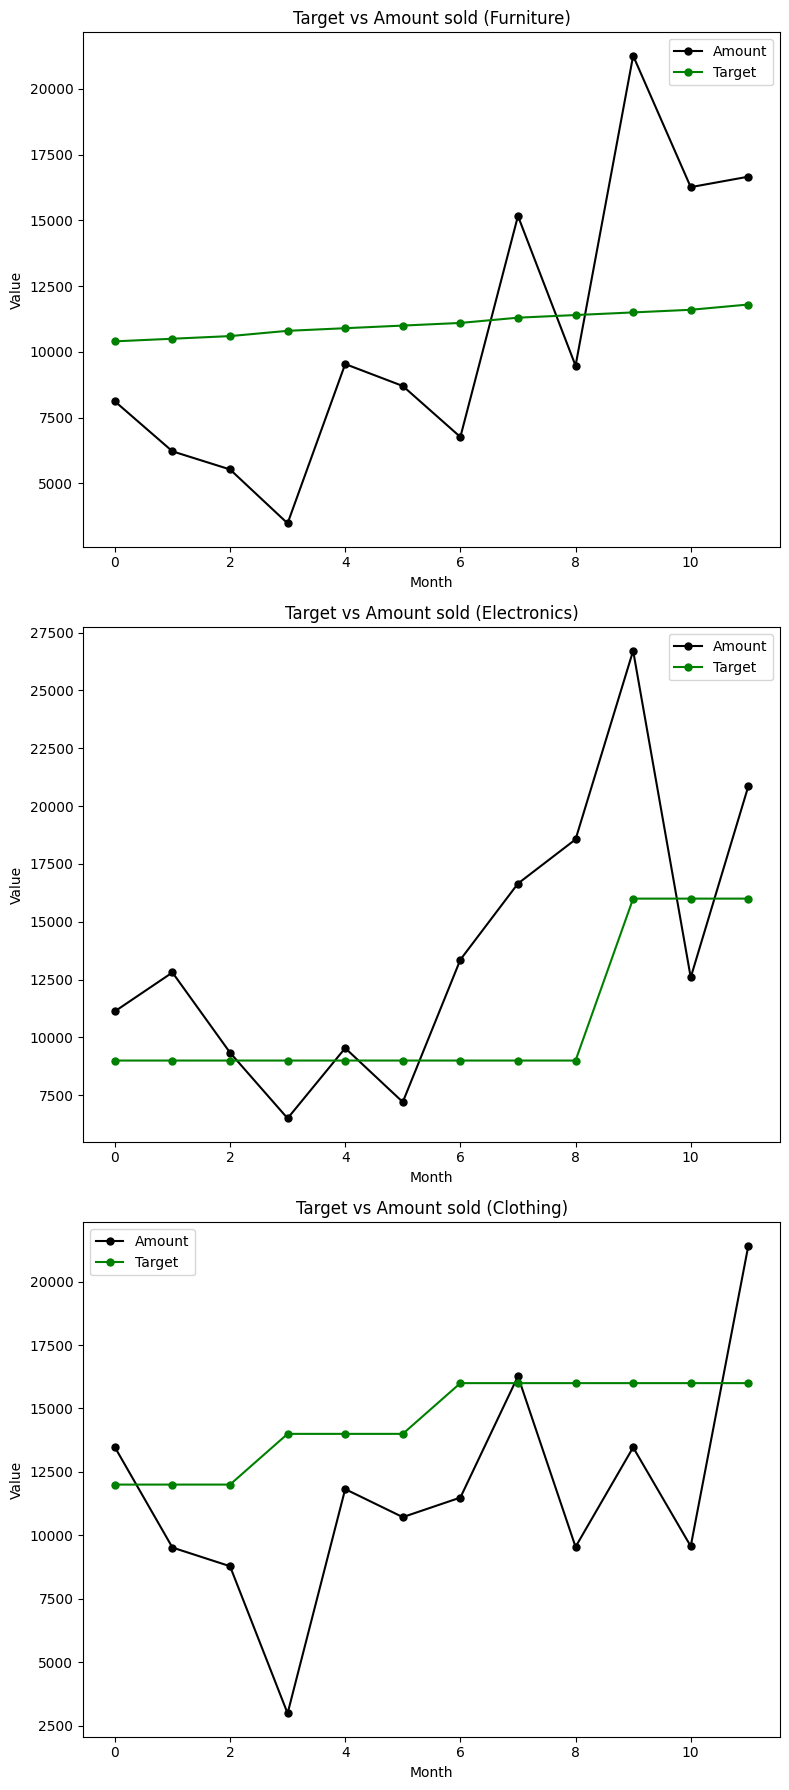

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

for i, ax in enumerate(axs):
    ax.plot(target_amounts[i], linestyle='-', marker='.', color='black', ms=10, label='Amount')

    ax.plot(target_target[i], linestyle='-', marker='.', color='green', ms=10, label='Target')

    ax.set_title("Target vs Amount sold ("f'{categories[i]}'")")
    ax.legend()
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

plt.tight_layout()

plt.show()

As can be seen by the Targets vs Amounts graphs for each category, the targets did not have an influence on the amount sold. It does however display underperforming categories.

In [ ]:
difference = [amount - target for amount, target in zip(target_amounts, target_target)]
difference = pd.DataFrame(difference).transpose()
difference.columns = categories
difference.head(12)

negative_values = {'Furniture':0, 'Electronics': 0, 'Clothing': 0}
for category in categories:
    negative_values[category] = difference.loc[difference[category] < 0, category].count()
print(negative_values)

{'Furniture': 8, 'Electronics': 3, 'Clothing': 9}


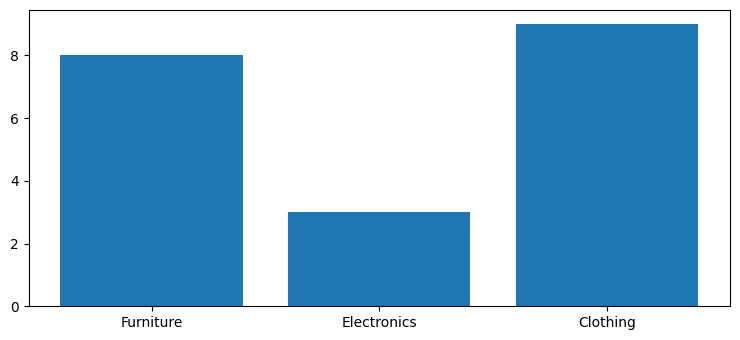

In [ ]:
names = list(negative_values.keys())
values = list(negative_values.values())

plt.bar(range(len(negative_values)), values, tick_label=names)
plt.show()

As can be seen, Clothing has the most amount of underperformance, whilst Electronics performs better, more frequently. This would further reinforce the notion that more investment into Electronics would yield more profit overall.

## Question 3
Question (Prediction): Can we predict the future sales based on historical data?
Analysis: Using historical data from the "list_of_orders.csv" dataset, we can build a predictive model to forecast future sales. By applying regression or time series analysis techniques, we can train the model on past sales patterns and make predictions for future periods. This analysis will provide insights into potential sales trends and assist in making informed business decisions.

In [ ]:
from sklearn.preprocessing import scale
import datetime

In [ ]:
# Find earliest date

df['Order Date'].sort_values()[0]

Timestamp('2018-04-01 00:00:00')

In [ ]:
# Create a list of all unique cities and Sub Categories

def create_unique_dictionary(df, column_name):
    unique_integer = df[column_name].unique()  # Find unique objects in the specified column
    indexing_dict = {}  # Create an empty dictionary

    # Assign unique integers as keys to the objects in the dictionary
    for i, object in enumerate(unique_integer):
        indexing_dict[i] = object

    return indexing_dict

In [ ]:
X = df.drop(['Order ID', 'State', 'Amount', 'Profit', 'Category', 'Quantity'], axis = 1)
y = df['Amount']

# Turn into Unix Epoch

X['Order Date'] = (df['Order Date'].astype('datetime64[s]')
                         - pd.Timestamp("2018-04-01")) // pd.Timedelta('1d')

# Unique City dictionary

city_dictionary = create_unique_dictionary(X, 'City')

X['City'] = X['City'].map({v: k for k, v in city_dictionary.items()})

# Sub-Category dictionary

sub_dictionary = create_unique_dictionary(X, 'Sub-Category')

X['Sub-Category'] = X['Sub-Category'].map({v: k for k, v in sub_dictionary.items()})

In [ ]:
X.dtypes

Order Date      int64
City            int64
Sub-Category    int64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression()

In [ ]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [ ]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [ ]:
print("The rsquared on the training data is {}.  The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.0031501885329399126.  The rsquared on the test data is -0.004109760833441056.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [ ]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [ ]:
print("The rsquared on the training data is {}.  The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.006317401411000456.  The rsquared on the test data is -0.0025381516566063134.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [ ]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [ ]:
print("The rsquared on the training data is {}.  The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.0031501885329399126.  The rsquared on the test data is -0.004109760833441056.


In [ ]:
compare_df = pd.DataFrame({'y_test': y_test, 'y_predict': y_test_preds})
ind = np.random.choice(len(compare_df), 10, replace=False)
compare_df.iloc[ind]

,y_test,y_predict
1305,32.0,323.060733
974,73.0,314.687512
998,1547.0,275.170798
101,273.0,275.261580
522,59.0,298.522836
67,1560.0,254.754381
1197,43.0,337.601259
1402,1137.0,290.799170
486,40.0,292.265467
597,122.0,261.096657


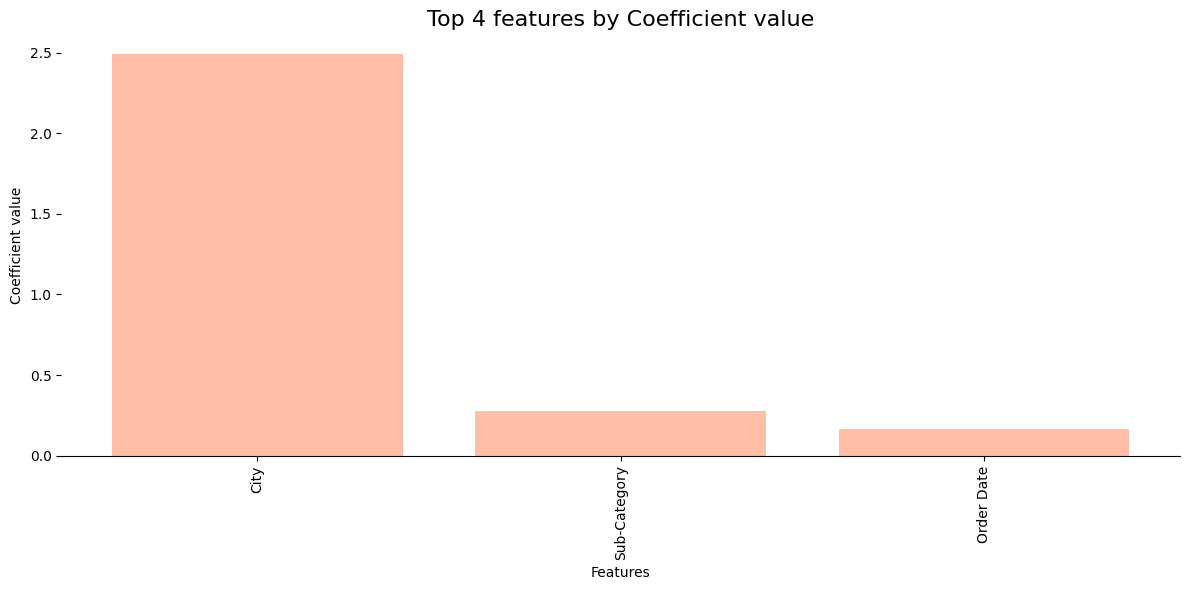

In [ ]:
features = sorted(zip(lm_model.coef_, X_train.columns), reverse=True)
attr = []
coef = []
number = 4

for feature in features:
    attr.append(feature[1])
    coef.append(feature[0])

plt.figure(figsize=(12, 6))
ax = plt.subplot()
ax.bar(attr[:number], height=coef[:number], color='coral', alpha=0.5)
sns.despine(top=True, right=True, left=True)
ax.xaxis.grid(False)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient value')
plt.title('Top {} features by Coefficient value'.format(number), fontsize=16)
plt.show()

## Question 3 analysis
As can be seen, the most important factor is the city, from this it can be assumed that investing into the highest performing companies would bring the biggest return of investments.